# Variables Aleatorias Continuas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> Ahora, centremos nuestra atención en VA continuas.

> A diferencia de las VA discretas, las VA continuas toman valores en un conjunto continuo de valores. Computacionalmente, saltar de discreto a continuo supone reemplazar sumas por integrales.


> **Objetivos:**
> - Repasar la definición de variables aleatorias continuas.
> - Definir la función de densidad de probabilidad y la función de distribución acumulada.
> - Definir el valor esperado (media) de una VA discreta.


> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop. Cap 1.2.
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_probability.pdf


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 1. Variables aleatorias continuas

También podemos definir probabilidades respecto a **V.A. continuas**

![thermo](https://upload.wikimedia.org/wikipedia/commons/e/e0/Thermometer_-_by_Don.jpg)

- Las variables aleatorias continuas son aquellas que pueden tomar un valores en rangos continuos (subconjuntos de $\mathbb{R}$).

- Un ejemplo de un fenómeno que podemos modelar con una VA continua es la temperatura del presente día.

- En este caso, la manera más conveniente de definir una distribución continua de probabilidad es a través de la Función de Densidad de Probabilidad (PDF - Probability Density Function), la cual asigna un valor no negativo de densidad de probabilidad para cada valor real.

- Como ejemplo, tomamos la distribución normal $X \sim \mathcal{N}(\mu, \sigma^2)$:
  $$
  p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}.
  $$

In [2]:
# Importar numpy
import numpy as np
# Importar stats de scipy
from scipy import stats
# Importar pyplot
from matplotlib import pyplot as plt

Text(0, 0.5, 'Densidad de probabilidad')

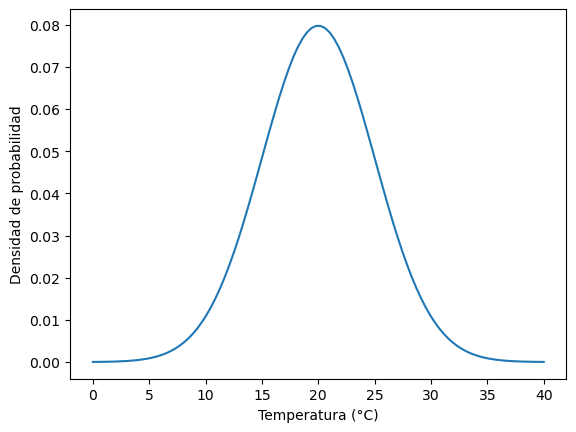

In [3]:
# Definir una VA normal para la temperatura
temperatura = stats.norm(loc=20, scale=5)
# Densidad normal
x = np.linspace(0, 40, 100)
plt.plot(x, temperatura.pdf(x))
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidad de probabilidad')

En el contexto de V.A. continuas no hablamos de función de probabilidad, sino de una **función de densidad de probabilidad p.d.f.** $p(x)$ que debe cumplir

$$
p(x) \geq 0
$$

y

$$
\int_{-\infty}^{\infty} p(x) \mathrm{d}x = 1.
$$

Notemos que en este caso la densidad puede ser mayor a $1$.

Con esto, la probabilidad de que $a \leq X \leq b$ es:

$$
p(a \leq X \leq b) = \int_{a}^{b} p(x) \mathrm{d}x
$$

Definimos también la **función de probabilidad acumulada c.d.f.** P(x) como:

$$
P(x) = \int_{-\infty}^{x} p(z) \mathrm{d}z,
$$

y respresenta la probabilidad de que $-\infty < X < x$. Por el teorema fundamental del cálculo $P'(x) = p(x)$.

In [4]:
# Verifiquemos lo anterior
temperatura.cdf(np.inf)

1.0

> **Observaciones.** Todo lo que vimos en el caso discreto se extiende al caso continuo:
>
> - La marginalización, la regla de la cadena, la regla de Bayes, aplican cambiando sumas por integrales y probabilidades por densidades de probabilidad:
>    - $p(x) = \int_{-\infty}^{\infty} p(x, y) \mathrm{d}y$: Marginalización
>    - $p(x, y) = p(y | x) p(x) = p(x | y) p(y)$: Regla de la cadena
>    - $p(x) = \int_{-\infty}^{\infty} p(x | y) p(y) \mathrm{d}y$: Probabilidad total

## 2. Distribuciones específicas

Veamos algunas distribuciones continuas fundamentales. Estas serán de mucha utilidad más adelante.

Para cada una, veremos el soporte, la densidad, la distribución acumulada y una descripción corta de lo que modelan.

### 2.1. Distribución uniforme

1. Parámetros: $a,b$
2. Soporte: $[a, b]$
3. Notación: $\text{Uniform}(a,b)$
4. pdf:
  $$
  p(x)=\frac{1}{b - a} \qquad \text{for } a\leq x\leq b.
  $$
5. cdf:
  $$
  P(x)=\frac{x-a}{b-a}  \qquad \text{for } a\leq x\leq b.
  $$
6. Modela situaciones donde todos los resultados en el soporte tienen igual probabilidad.

**Ejemplo.** Se tiene una cinta de medir con resolución milimétrica. Si medimos la longitud de una varillas que fueron cortadas a 1 metro de longitud, el error de medición estará uniformemente distribuido entre -0.5 y 0.5 milímetros.

In [5]:
# Variable aleatoria uniforme
error = stats.uniform(loc=-0.1, scale=0.2)  # U(-0.1, 0.1)

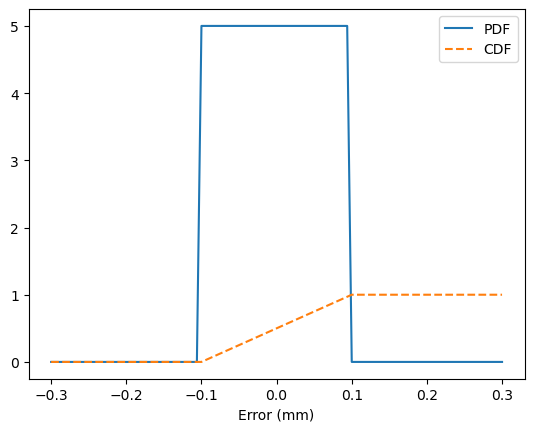

In [6]:
# Gráfico de pdf y cdf
x = np.linspace(-0.3, 0.3, 100)
plt.plot(x, error.pdf(x), label='PDF')
plt.plot(x, error.cdf(x), ls='--', label='CDF')
plt.xlabel('Error (mm)')
plt.legend()


📌 **Características clave:**
- Todos los valores entre \(a\) y \(b\) son igualmente probables.
- Gráfica: línea horizontal constante en el intervalo.
- Ejemplos: temperatura constante en un rango, generadores de números aleatorios.

**Pistas para identificarla:**
- Existe un **mínimo y máximo definidos**.
- No hay tendencia hacia un valor central.


### 2.2. Distribución exponencial

1. Parámetro $\lambda$.
2. Soporte $[0, \infty)$.
3. Notación $\text{Exponential}(\lambda)$.
4. pdf:
   $$
   p(x) = \lambda e^{-\lambda x} \qquad \text{for } x \geq 0.
   $$
5. cdf:
   $$
   P(x) = 1 - e^{-\lambda x} \qquad \text{for } x \geq 0.
   $$
6. Modela el tiempo de espera de un proceso continuo para cambiar de estado.

**Ejemplo.** Si salen del iteso para tomar un taxi en el Periférico, el tiempo de espera en minutos distribuye exponencialmente. Una buena estimación para $\lambda$ en este caso está dada por $\frac{1}{\text{tiempo de espera promedio}}$.

In [7]:
# Parámetro lambda
lambda_ = 1 / 3  # 3 minutos promedio de espera

In [8]:
tiempo_espera = stats.expon(scale=1/lambda_)

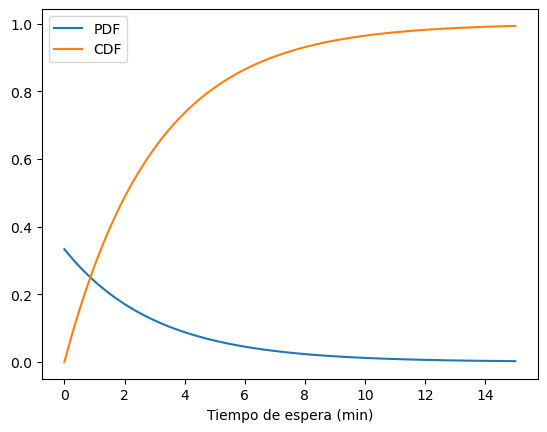

In [9]:
# Gráfico de pdf y cdf
x = np.linspace(0, 15, 100)
plt.plot(x, tiempo_espera.pdf(x), label='PDF')
plt.plot(x, tiempo_espera.cdf(x), label='CDF')
plt.xlabel('Tiempo de espera (min)')
plt.legend()

📌 **Características clave:**
- Modela **tiempo de espera** hasta el siguiente evento.
- Propiedad "sin memoria".
- La media es \(1/\lambda\).
- Ejemplos: tiempo entre llegadas de clientes, vida útil de un componente electrónico.

**Pistas para identificarla:**
- Se habla de **tiempo hasta que ocurre algo**.
- Eventos ocurren a **tasa constante** en el tiempo.
- Valores cercanos a cero son más probables.


### 2.3. Distribución normal

1. Parámetros: $\mu,\sigma$
2. Soporte: $(-\infty, \infty)$
3. Notación: $\text{Normal}(\mu,\sigma^2)$
4. pdf:
  $$
  p(x)= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}.
  $$
5. cdf: No tenemos una fórmula cerrada para la cdf de una distribución normal. Esta involucra un cálculo numérico que antes era común buscar en tablas, y al día de hoy podemos usar software.
6. Modela: error de medición, altura, promedios de grandes cantidades de datos.

**Ejemplo.** Promedio de temperatura en una zona cerca del Ecuador.

In [10]:
temp_promedio = 20
dispersion = 3

In [11]:
temperatura = stats.norm(loc=temp_promedio, scale=dispersion)

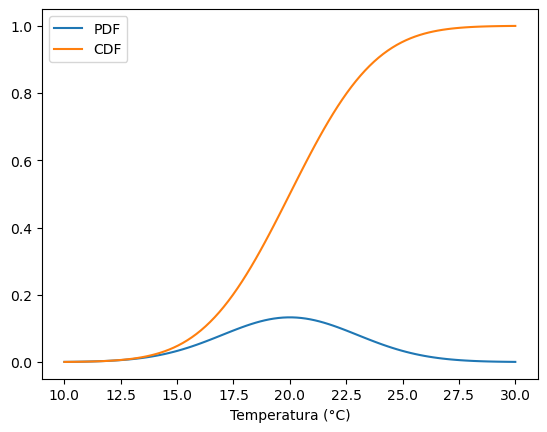

In [12]:
# Gráfico de pdf y cdf
x = np.linspace(10, 30, 100)
plt.plot(x, temperatura.pdf(x), label='PDF')
plt.plot(x, temperatura.cdf(x), label='CDF')
plt.xlabel('Temperatura (°C)')
plt.legend()

📌 **Características clave:**
- Forma de campana: simétrica alrededor de la media \(\mu\).
- Controlada por la media (\(\mu\)) y desviación estándar (\(\sigma\)).
- Ejemplos: estaturas, puntuaciones de exámenes, errores de medición.

**Pistas para identificarla:**
- Datos simétricos y concentrados en torno a un valor central.
- Fenómenos que resultan de la suma de muchas variables pequeñas.


### Ejemplo:

Lee cada situación y determina:
1. Qué distribución continua es la más apropiada (Uniforme, Exponencial o Normal).
2. Cuáles son sus parámetros (mínimo y máximo; media y desviación estándar; o tasa/λ según el caso).
3. Explica brevemente tu razonamiento.

---

#### Ejercicio 1
La duración de una llamada en un centro de atención al cliente se modela con un promedio de 6 minutos y ocurre que las llamadas muy largas son poco probables.

---

#### Ejercicio 2
La estatura de los estudiantes de una universidad sigue un patrón simétrico y con forma de campana, con media de 1.72 m y desviación estándar de 0.08 m.

---

#### Ejercicio 3
Un sensor mide la temperatura ambiente y se sabe que en cierto día oscila uniformemente entre 20 °C y 28 °C, siendo cualquier valor dentro de ese rango igual de probable.

---

#### Ejercicio 4
El tiempo (en horas) que pasa hasta que llega el siguiente cliente a una cafetería sigue una tasa promedio de 5 clientes por hora.

---

#### Ejercicio 5
El peso de tomates en un lote se aproxima por una distribución con media de 150 g y desviación estándar de 15 g, con forma de campana.

---

#### Ejercicio 6
Un generador de números aleatorios devuelve valores igualmente probables entre 0 y 1.

---

**Espacio para respuestas:**

| Ejercicio | Distribución | Parámetros              | Justificación breve |
|-----------|--------------|-------------------------|---------------------|
| 1         | Exponencial  | $\lambda = 1/6$         |                     |
| 2         | Normal       | $\mu=1.72; \sigma=0.08$ |                     |
| 3         | Uniforme     | $a=20; b=28$            |                     |
| 4         | Exponencial  | $\lambda = 5$           |                     |
| 5         | Normal       | $\mu=150; \sigma=15$    |                     |
| 6         | Uniforme     | $a=0; b=1$              |                     |

## 🔍 Diagrama de decisión rápido

     ¿Valores dentro de un rango [a,b] con igual probabilidad?
                  ├── Sí → Uniforme
                  └── No
     ¿Se modela tiempo o distancia hasta un evento?
                  ├── Sí, con tasa constante → Exponencial
                  └── No
     ¿Forma de campana y simétrica?
                  ├── Sí → Normal
                  └── Requiere otro modelo


## 2. Estadísticos: Valor esperado y varianza
Una de las operaciones más importantes con probabilidades es la de encontrar promedios ponderados de funciones. El **valor esperado** de una función $f(x)$ respecto a una distribución $p(x)$, denotado por $\mathbb{E}_p[f]$, está dado por:

- Para una distribución continua:
  
  $$
  \mathbb{E}_p[f] = \int p(x)f(x) \mathrm{d}x.
  $$
El valor esperado es una *medida de tendencia central*, en el sentido que nos da un valor hacia el cual tiende a agruparse los datos. Una medida de la variabilidad al rededor del valor esperado es **la varianza**, denotada por $\mathrm{var}_p[f]$, que está definida por:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[(f(x) - \mathbb{E}_p[f])^2] = \mathbb{E}_p[f(x)^2] - \mathbb{E}_p[f]^2.
$$


### Ejemplos: Distribuciones normales con diferentes medias, y varianzas

In [13]:
# Definir varias VA normal
X = stats.norm(loc=0, scale=1)    # N(0,1)
Y = stats.norm(loc=0, scale=2)    # N(0,2)
Z = stats.norm(loc=-3, scale=1)   # N(-3,1)

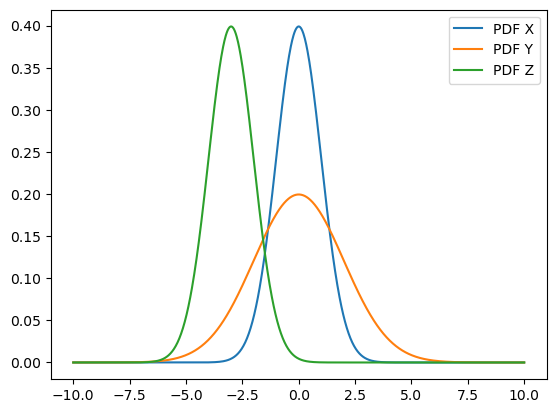

In [14]:
# Gráfico de pdf y cdf
x = np.linspace(-10, 10, 1000)
plt.plot(x, X.pdf(x), label='PDF X')
plt.plot(x, Y.pdf(x), label='PDF Y')
plt.plot(x, Z.pdf(x), label='PDF Z')
plt.legend()

### Propiedes de la distribución normal

Si $X \sim \text{Normal}(\mu, \sigma^2)$, entonces:

- El valor esperado de $X$ coincide con $\mu$:
  $$
  \mathbb{E}_p[X] = \mu.
  $$

- La varianza $X$ coincide con $\sigma^2$:
  $$
  \mathrm{var}_p[X] = \sigma^2
  $$

# Anuncios parroquiales

### 1. Quiz la siguiente clase.
### 2. [Lectura recomendada](https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_class06-prep-b.pdf)
### 2. Tarea 1 para el sábado 14 de septiembre.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>